# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("previsao_de_renda.csv")

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


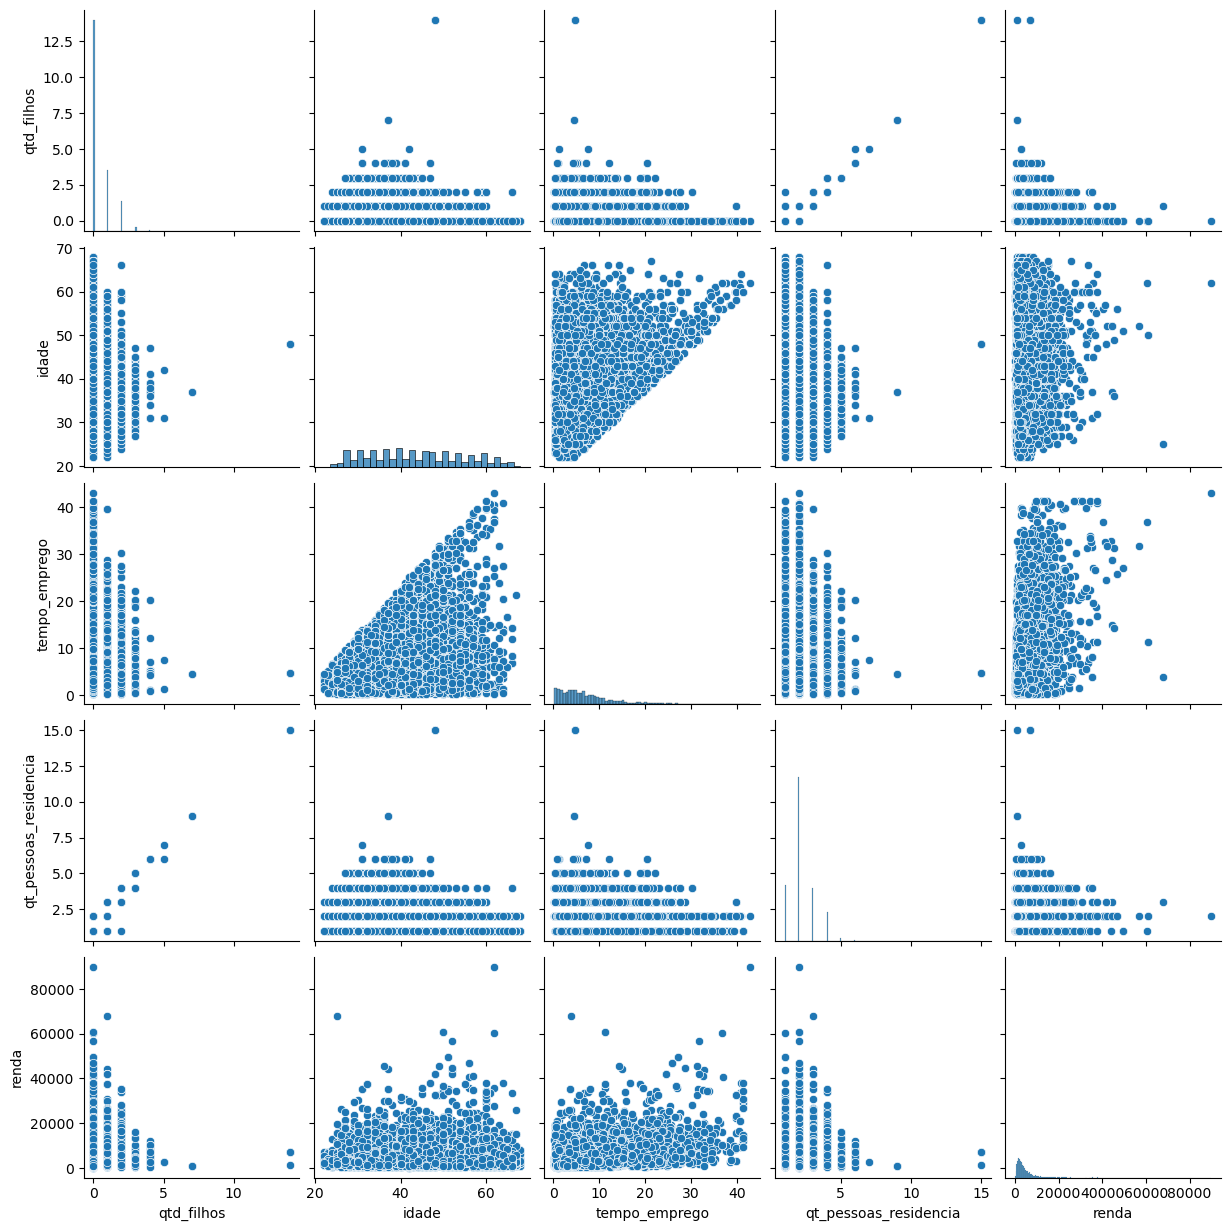

In [54]:
df_renda = df[['qtd_filhos', 'idade', 'tempo_emprego',
              'qt_pessoas_residencia', 'renda']]
sns.pairplot(df_renda)
plt.show()

O gráico de matriz de dispersão mostra que quanto maior o número de filhos e a quantidade de pessoas na residência, menor a renda que o cliente possui. Além disso, há uma grande dispersão entre a idade do cliente e seu tempo de emprego em relação à sua renda.

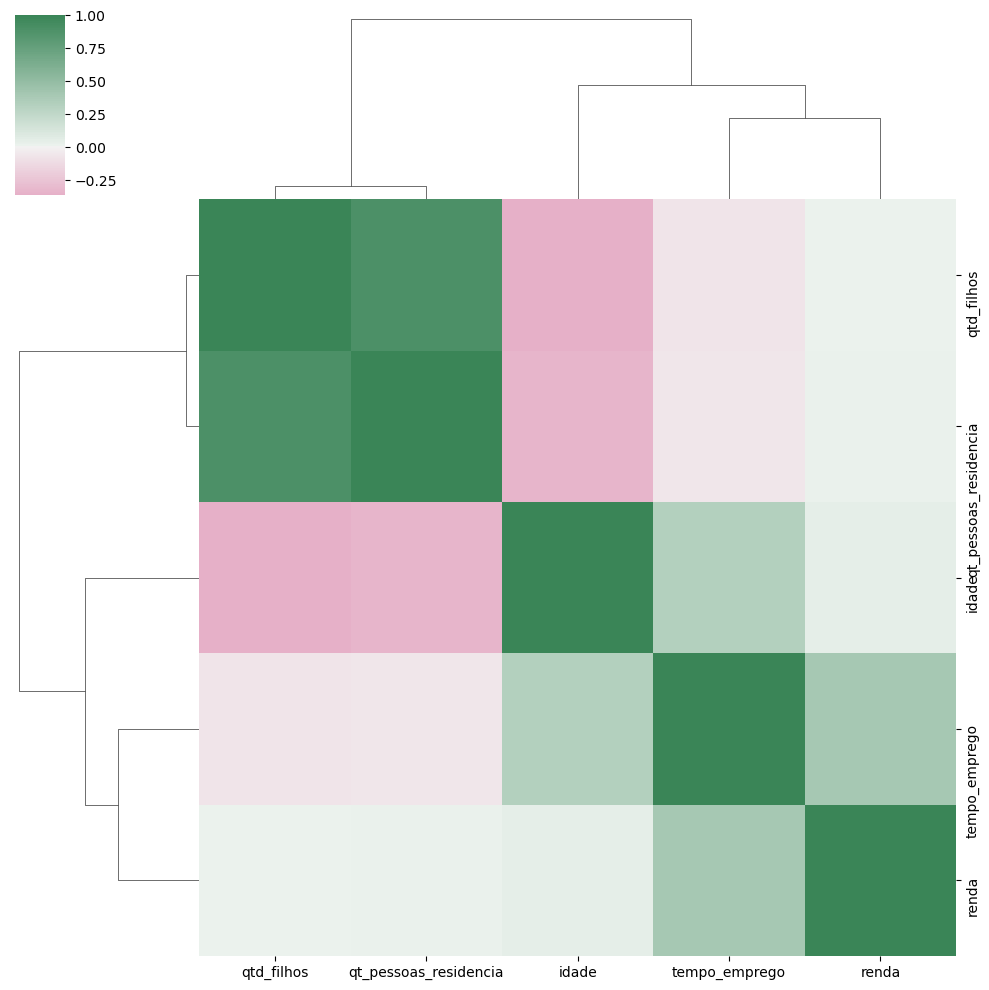

In [55]:
cmap = sns.diverging_palette(h_neg=350, h_pos=500, as_cmap=True, center='light')

sns.clustermap(df_renda.corr(), figsize=(10, 10), center = 0, cmap=cmap)
plt.show()

A avaliação gráfica da matriz de correlações mostra que a correlação a variável mais correlacionada à renda do cliente é o seu tempo de emprego, estando entre 0.25 e 0.5; em segundo lugar, vem a idade, que está entre 0.0 e 0.25. Estes resultados se opõem aos obtidos no gráfico de dispersão, uma vez que neste o número de filhos e a quantidade de pessoas na residência destacavam-se mais em relação à renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

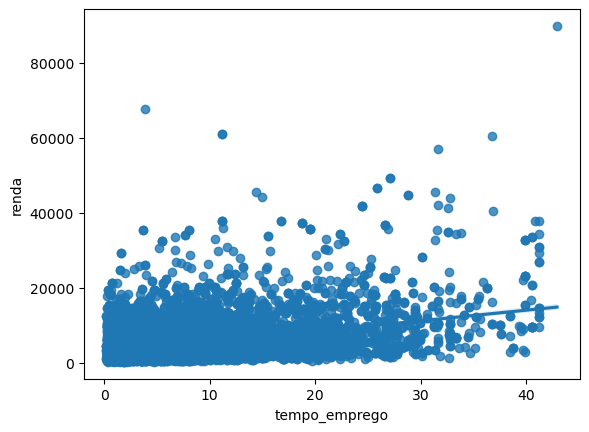

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


In [56]:
# Gráfico de dispersão do tempo de emprego em relação à renda
_ = sns.regplot(x='tempo_emprego', y='renda', data = df_renda)
plt.show()

df_renda[['tempo_emprego', 'renda']].corr()

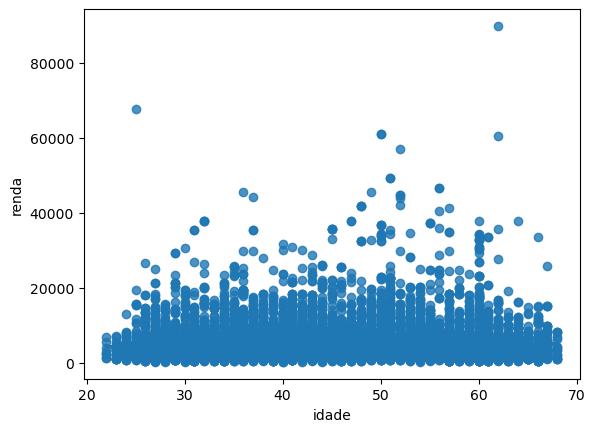

,idade,renda
idade,1.00000,0.04257
renda,0.04257,1.00000


In [57]:
# Gráfico de dispersão da idade em relação à renda
_ = sns.regplot(x='idade', y='renda', data = df_renda)
plt.show()

df_renda[['idade', 'renda']].corr()

3) Na sua opinião, há outliers na variável renda?

Os gráficos de dispersão gerados mostram que há outliers na variável renda. No gráfico renda x tempo_emprego, destacam-se os pontos em que a renda é superior a 60000 nos casos em que o tempo_emprego está entre 0 e 10, entre 10 e 20, e no caso superior a 40. No caso renda x idade, são notáveis os pontos em que a renda também é maior do que 60000, mas nos intervalos em que a idade está entre 20 e 30, e entre 60 e 70. 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

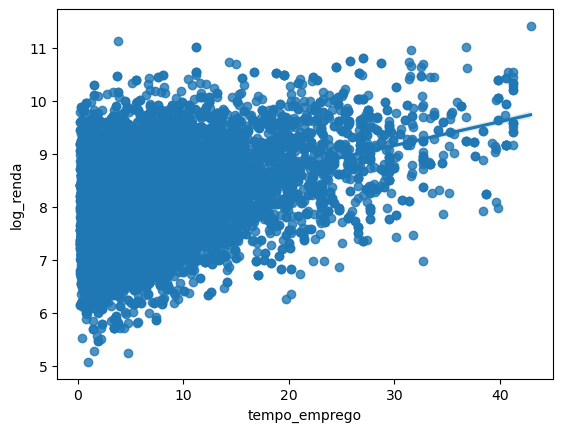

In [58]:
df_log = df_renda.copy()
df_log['log_renda'] = np.log(df_renda['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_renda', data = df_log)
plt.show()

In [59]:
df_log[['tempo_emprego', 'log_renda']].corr()

,tempo_emprego,log_renda
tempo_emprego,1.000000,0.379556
log_renda,0.379556,1.000000


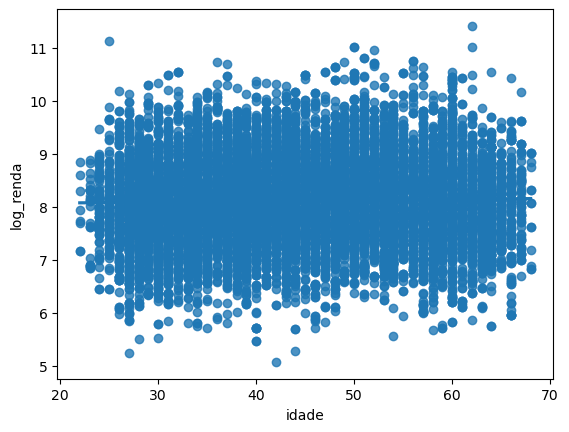

In [60]:
_ = sns.regplot(x='idade', y='log_renda', data = df_log)
plt.show()

In [61]:
df_log[['idade', 'log_renda']].corr()

,idade,log_renda
idade,1.000000,0.024712
log_renda,0.024712,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do LOG piorou a análise, uma vez que as correlações entre o logaritmo da renda e as duas variáveis em questão (idade e tempo_emprego) são menores do que na primeira análise. 